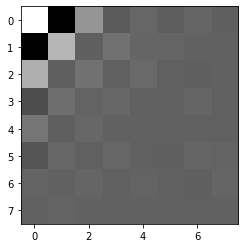

In [19]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from scipy.fftpack import dctn, idctn

quantize_matrix = np.array([[16,11,10,16,24,40,51,61],
                            [12,12,14,19,26,58,60,55],
                            [14,13,16,24,40,57,69,56],
                            [14,17,22,29,51,87,80,62],
                            [18,22,37,56,68,109,103,77],
                            [24,35,55,64,81,104,113,92],
                            [49,64,78,87,103,121,120,101],
                            [72,92,95,98,112,100,130,99]])

sequence = [-40.0, 8.0, 7.0, 1.0, 5.0, 1.0, -1.0, 1.0, 1.0, -1.0, 0.0, -0.0, 1.0, 'EOB']

def zigzagarry_to_matrix(lst, vmax, hmax):
    h = 0
    v = 0
    vmin = 0
    hmin = 0
    i = 0
    matrix = np.zeros((vmax, hmax))

    while ((v < vmax) and (h < hmax)): 
        if ((h + v) % 2) == 0:                 
            if (v == vmin):
                matrix[v, h] = lst[i]      
                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        
                i = i + 1
            elif ((h == hmax -1 ) and (v < vmax)):   
                matrix[v, h] = lst[i] 
                v = v + 1
                i = i + 1
            elif ((v > vmin) and (h < hmax -1 )):    
                matrix[v, h] = lst[i] 
                v = v - 1
                h = h + 1
                i = i + 1
        else:
            if ((v == vmax -1) and (h <= hmax -1)): 
                matrix[v, h] = lst[i] 
                h = h + 1
                i = i + 1
            elif (h == hmin):
                matrix[v, h] = lst[i] 
                if (v == vmax -1):
                    h = h + 1
                else:
                    v = v + 1
                i = i + 1
            elif((v < vmax -1) and (h > hmin)):
                matrix[v, h] = lst[i] 
                v = v + 1
                h = h - 1
                i = i + 1
        if ((v == vmax-1) and (h == hmax-1)):
            matrix[v, h] = lst[i] 
            break
            
    return matrix


def sequence_to_block(sequence):
    
    new_sequence=[]
    for i in sequence:
        if i !='EOB':
            new_sequence.append(i)
        elif i == 'EOB':
            while len(new_sequence) <=63:
                new_sequence.append(1.0)
    return zigzagarry_to_matrix(new_sequence, 8, 8)


def inverse_transform(block):
    dct_invers = idctn(block)
    dct_invers += 128
    
    return dct_invers

def inverse_transform(block): 
    dct_invers = idctn(block)
    dct_invers += 128
    return inverse_dct


path5='C:/Users/jobe/Desktop/HW 4/subimage_compressed.bmp'
T_hat = sequence_to_block(sequence) 
T_dot =  (quantize_matrix)*(T_hat )
subimage_compressed = inverse_transform(T_dot)
plt.imsave('subimage_compressed.bmp', subimage_compressed)
read_subimage_compressed = cv2.imread(path5 ,  0)
plt.imshow(read_subimage_compressed, cmap = 'gray')
plt.show()
    